## Wigner Intracule Plots


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rc('font', family='sans-serif',serif='Sans')
mpl.rc('font', size=16)

In [2]:
n = 256
filename = '../fortran/data/z2_a1e00_b1e00/n{n}/psi_itp.out'.format(n=n)
wfn = np.loadtxt(filename)
psi = wfn.reshape(n,n)[::-1]
density = psi**2

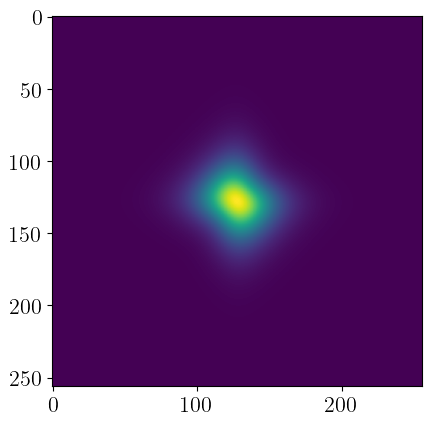

In [3]:
plt.imshow(psi)

$$
\begin{align*}
\mathcal{W}(u,v) =& \frac{2}{\pi} \int dx_{i} \int dz  \cos(2vz)\times \\
    & \hspace{1em} \left[ \Psi^{*}(x_{i}+z, x_{i}-z + u)\Psi(x_{i}-z, x_{i}+z+ u) \right.\\ 
    & \left.+ \Psi^{*}(x_{i}+z, x_{i}-z - u)\Psi(x_{i}-z, x_{i}+z-u)\right]
\end{align*}
$$

In [4]:
def wigner_intracule(psi):
    x0=10
    n = int(np.sqrt(psi.shape[0]))
    dx=2*x0/(n-1)
    L=x0/4
    m=int(2*L/dx)
    wdim=int(2*L/dx)
    Z=np.zeros(wdim*wdim)
    for u in range(1,wdim+1):
        for v in range(1,wdim+1):
            t1=0
            for j in range(1,m+1):
                t2 = 0
                for i in range(1,m+1):
                    a=int((i+j-m) + n/2 )
                    b=int((i-j) + n/2 )
                    t2 += (psi[(a-1)*n+b+u-1]*psi[(b-1)*n+a+u-1])
                    t2 += (psi[(a-1)*n+b-u-1]*psi[(b-1)*n+a-u-1])
                t2 = t2*np.cos(2*v*dx*(j*dx-L))*2/(np.pi)
                t1 += t2
            Z[wdim*(u-1)+v-1]=t1
    return Z


In [5]:
Z = wigner_intracule(wfn)

Text(0, 0.5, 'relative momentum')

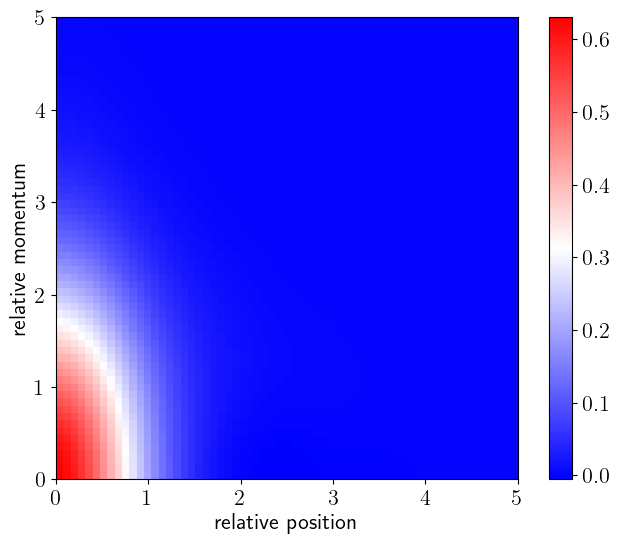

In [6]:
x0 = 10.0
plt.figure(figsize=(8, 6)) 
zmax = np.max(Z)
m = int(np.sqrt(Z.shape[0]))
plt.imshow(Z.reshape(m,m),cmap='bwr',extent=[0,x0/2,0,x0/2],origin='lower')
plt.colorbar()  
plt.xlabel('relative position')
plt.ylabel('relative momentum')
